In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
#Create dummy data
# from sklearn.datasets.samples_generator import make_blobs

# X, _ = make_blobs(n_samples=500, centers=4,
#                             cluster_std=0.70, random_state=0)

# X = np.array ([[1,2,3],
#                [5,8,3],
#                [1.5, 1.8,6],
#                [8,8,8],
#                [1, 0.6, 0.9],
#                [9,11, 3]])


file = os.path.join("features.csv")
df = pd.read_csv(file)
#df = df.drop(['class'], axis=1)
df.dropna(inplace=True)
#df.isnull().sum()
df = df.tail(5000)
df.head()

,Unnamed: 0,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
138679,138679,0.940,0.344,0.1620,1sZxjg4vM9sgnna6skPxZP,0.362,7,0.0675,-18.017,1,0.0450,92.413,0.3510
138680,138680,0.979,0.239,0.0629,6slFqUzr9KSygvSweusBuQ,0.326,6,0.0484,-23.875,0,0.0421,99.945,0.0355
138681,138681,0.745,0.386,0.1240,4FCnessK9lHqSVkz67YUei,0.647,2,0.2920,-21.420,0,0.0491,96.583,0.4420
138682,138682,0.899,0.533,0.2010,5HlaKWvEb6XucKCtVxmW9P,0.185,2,0.2420,-20.439,1,0.0556,96.550,0.6910
138683,138683,0.975,0.229,0.1850,6zRMqFtW5Wr2vy4HIDRzQc,0.485,7,0.0828,-18.839,0,0.0472,94.586,0.0385


In [3]:
# Plot and show scatter - ORIGINAL
# plt.scatter(X[:, 0], X[:, 1])
# plt.show()

# SENTDEX HELP

X = np.array(df.drop(['Unnamed: 0', 'id', 'acousticness', 'instrumentalness','key','liveness','mode','tempo','valence'],1).astype(float))
X = preprocessing.scale(X)
X = preprocessing.normalize(X)
y = np.array(df['id'])

In [4]:
# Create a kmeans model using k = 12
# from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12, random_state=21)

# Fit the model to the data
kmeans.fit(X)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)

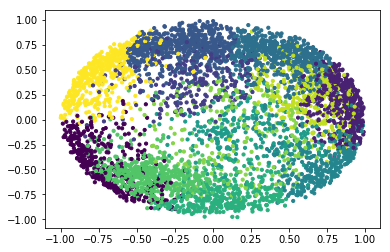

In [5]:
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=10, cmap='viridis')
plt.show()

In [6]:
# Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [7]:
centers

array([[-0.6855798 , -0.42396519,  0.04832345, -0.39549425],
       [ 0.83204958,  0.16835822,  0.24237442, -0.26844604],
       [-0.16927228,  0.3869753 ,  0.32312858,  0.7302992 ],
       [-0.20505783,  0.71908604,  0.4979367 , -0.23694921],
       [ 0.45986125,  0.61990074,  0.45642435, -0.26336675],
       [ 0.70169249, -0.38115921, -0.2301146 , -0.29126543],
       [ 0.23663916, -0.15306358, -0.0907892 ,  0.85710077],
       [ 0.07077522, -0.76256165, -0.3630184 , -0.33554212],
       [-0.39822148, -0.54256631, -0.64314002, -0.14510823],
       [ 0.16459627, -0.17237082,  0.48826764, -0.65785097],
       [ 0.62888582,  0.24749823,  0.27892053,  0.54760115],
       [-0.71604711,  0.43754295,  0.21846215, -0.20212012]])

In [8]:
labels

array([8, 8, 8, ..., 3, 4, 1])

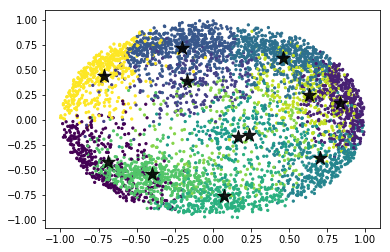

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], marker = "*", c='black', s=200, alpha=0.9)

plt.show()

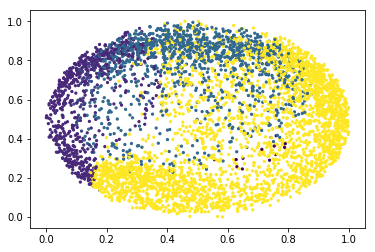

In [14]:
#####PROBABLY DON'T USE#####
#scale data
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
# print(rescaledX)

kmeans_rescaledX = KMeans(n_clusters=2)
# Fit the model to the data
kmeans_rescaledX.fit(rescaledX)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
rescaledX_predicted_clusters = kmeans.predict(rescaledX)



#scaled plot
plt.scatter(rescaledX[:, 0], rescaledX[:, 1], c=rescaledX_predicted_clusters, s=5, cmap='viridis')
plt.show()

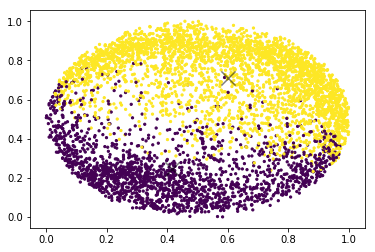

In [15]:
#####PROBABLY DON'T USE#####
centers_rescaledX = kmeans_rescaledX.cluster_centers_
labels_rescaledX = kmeans_rescaledX.labels_
# print(centers_rescaledX)
# print(labels_rescaledX)

plt.scatter(rescaledX[:, 0], rescaledX[:, 1], c=labels_rescaledX, s=5, cmap='viridis')
plt.scatter(centers_rescaledX[:, 0], centers_rescaledX[:, 1], marker = "x", c='black', s=200, alpha=0.5)

plt.show()

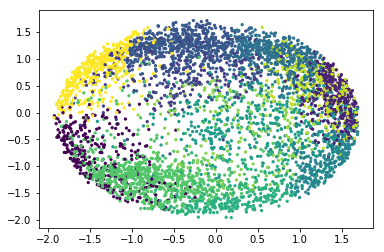

In [16]:
#####PROBABLY DON'T USE#####
#StandardScaler - SS
SSX = preprocessing.StandardScaler().fit(X)
rescaled_SSX = SSX.transform(X)
# print(rescaledX)

kmeans_rescaled_SSX = KMeans(n_clusters=2, random_state=20)
# Fit the model to the data
kmeans_rescaled_SSX.fit(rescaled_SSX)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
rescaled_SSX_predicted_clusters = kmeans.predict(rescaled_SSX)



#scaled plot
plt.scatter(rescaled_SSX[:, 0], rescaled_SSX[:, 1], c=rescaled_SSX_predicted_clusters, s=5, cmap='viridis')
plt.show()

In [17]:
# print describe max in each column
i=1
x = range(len(X))
for i in x:
    j = X[:,i].max()
    print(f'Max Feature {i}: {j}')
    k = X[:,i].min()
    print(f'Min Feature {i}: {k}')



print(rescaled_SSX)

Max Feature 0: 0.9900884671750819
Min Feature 0: -0.9988123962321744
Max Feature 1: 0.9893261988985722
Min Feature 1: -0.9788349524970636
Max Feature 2: 0.9548162197743473
Min Feature 2: -0.9803881979575084
Max Feature 3: 0.9974378967659535
Min Feature 3: -0.9895492840062955


IndexError: index 4 is out of bounds for axis 1 with size 4